# Problem 1.

In [1]:
import pandas as pd
import numpy as np

rawData = pd.read_csv('diabetes.csv')

In [2]:
rawData.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

-No null values, so no need to remove anything.

In [3]:
rawData.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

-Double checking with the actual file the names and data types are all correct.

In [4]:
#count the number of 0s
(~rawData.astype(bool)).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [5]:
#remove any people with 0s in Glucose, BP, and BMI
eData = rawData[rawData.Glucose != 0]
eData = eData[eData.BloodPressure != 0]
eData = eData[eData.BMI != 0]
(~eData.astype(bool)).sum()

Pregnancies                  99
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     475
dtype: int64

In [6]:
#data for edited dataframe
print('Dimensions:')
print(eData.shape)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(eData.describe())

Dimensions:
(724, 9)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   724.000000  724.000000     724.000000     724.000000  724.000000   
mean      3.866022  121.882597      72.400552      21.443370   84.494475   
std       3.362803   30.750030      12.379870      15.732756  117.016513   
min       0.000000   44.000000      24.000000       0.000000    0.000000   
25%       1.000000   99.750000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      24.000000   48.000000   
75%       6.000000  142.000000      80.000000      33.000000  130.500000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  724.000000                724.000000  724.000000  724.000000  
mean    32.467127                  0.474765   33.350829    0.343923  
std      6.888941                  0.332315 

# Problem 2.

In [7]:
#limit dataframe to women with
selectWomen = eData[eData.BMI > 30]
selectWomen = selectWomen[selectWomen.Outcome == 0]
selectWomen = selectWomen[selectWomen.Glucose <= 199]
selectWomen = selectWomen[selectWomen.Glucose >= 140]

print(len(selectWomen), 'prediabetic obese women')
#print()
#selectWomen.head()

37 prediabetic obese women


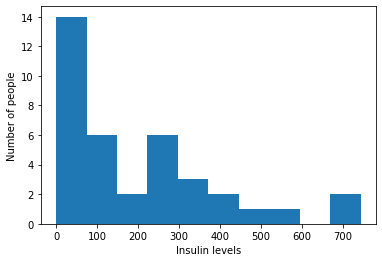

In [8]:
import matplotlib.pyplot as plt

plt.hist(selectWomen.Insulin)
plt.xlabel('Insulin levels')
plt.ylabel('Number of people')
plt.show()

Most of the women in the dataset have low insulin levels

# Problem 3.

In [9]:
#bitmasks for sorted BMI into catagories
underweight  = (eData.BMI < 18.5)
normalweight = (eData.BMI < 25) & ~underweight
overweight   = (eData.BMI < 30) & ~underweight & ~normalweight
obese        = (eData.BMI >= 30)

#sort BMI into 4 catagories
eData.loc[underweight, 'Weight'] = 'underweight'
eData.loc[normalweight, 'Weight'] = 'normalweight'
eData.loc[overweight, 'Weight'] = 'overweight'
eData.loc[obese, 'Weight'] = 'obese'

#bitmasks for sorted BP into catagories
normal = eData.BloodPressure <= 80
stage2hypertension = eData.BloodPressure > 89
stage1hypertension = ~(normal | stage2hypertension)

#sort BP into 3 catagories
eData.loc[normal, 'BPclass'] = 'normal'
eData.loc[stage1hypertension, 'BPclass'] = 'stage1hypertension'
eData.loc[stage2hypertension, 'BPclass'] = 'stage2hypertension'

In [10]:
#number of women in each BMI catagory
print(len(eData[underweight]), 'underweight women')
print(len(eData[normalweight]), 'nomralweight women')
print(len(eData[overweight]), 'overweight women')
print(len(eData[obese]), 'obese women')

4 underweight women
96 nomralweight women
171 overweight women
453 obese women


In [11]:
import math
#solve pigeon hole
print('Since the total number of women is', len(eData), 'then there must be at least', math.ceil(len(eData)/4), 'women in a certain catagory of Weight.')

Since the total number of women is 724 then there must be at least 181 women in a certain catagory of Weight.


In [12]:
#number of women in each BP catagory
print(len(eData[normal]), 'women with normal blood pressure')
print(len(eData[stage1hypertension]), 'women with stage 1 hypertension')
print(len(eData[stage2hypertension]), 'women with stage 2 hypertension')

561 women with normal blood pressure
104 women with stage 1 hypertension
59 women with stage 2 hypertension


In [13]:
#pigeon hole #2
print('since the total number of women is', len(eData), 'then there must be at least', math.ceil(len(eData)/3), 'women in a certain catagory of BPclass.')

since the total number of women is 724 then there must be at least 242 women in a certain catagory of BPclass.


# Problem 4.

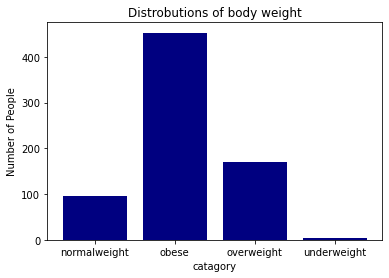

In [14]:
#not sure if this is stable code, pivot_table may not return an aplhabetized list and it just so happend to work here
weightCatagories = sorted(eData.Weight.unique())
peoplePerWeight = eData.pivot_table(index='Weight', aggfunc='size')
plt.bar(weightCatagories, peoplePerWeight, color='navy')
plt.xlabel('catagory')
plt.ylabel('Number of People')
plt.title('Distrobutions of body weight')
plt.show()

With this graph we're able to see that most women in this survey were obese.

Text(0.5, 1.0, 'Percent of people with hypertension')

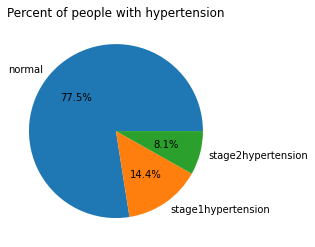

In [15]:
BPCatagories = sorted(eData.BPclass.unique())
peoplePerBP = eData.pivot_table(index='BPclass', aggfunc='size')
plt.pie(peoplePerBP, labels=BPCatagories, autopct='%1.1f%%')
plt.title('Percent of people with hypertension')

With this pie chart we can see that over 3/4ths of women had normal blood pressure levels.

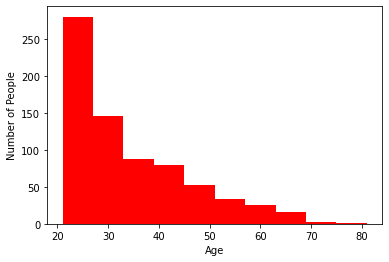

In [16]:
plt.hist(eData.Age, color='red')
plt.ylabel('Number of People')
plt.xlabel('Age')
plt.show()

With this histogram we're able to see that over half of the population were women from the age of 20-25.

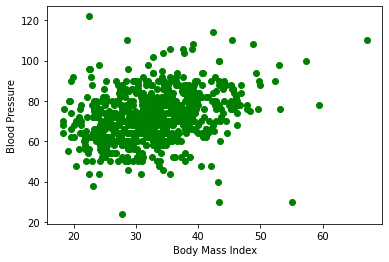

In [17]:
plt.scatter(eData.BMI, eData.BloodPressure, color='green')
plt.xlabel('Body Mass Index')
plt.ylabel('Blood Pressure')
plt.show()

 I know normal blood pressure is below 80 and I looked up healthy BMI for women were between 20-25 so I'm curious as to where the center of mass for this plot is.

In [18]:
xMass = eData.BloodPressure.sum() / len(eData)
yMass = eData.BMI.sum() / len(eData)
print('The center of mass is (', xMass, ',', yMass, ')')

The center of mass is ( 72.40055248618785 , 32.46712707182321 )


So it seems that most of these women have a normal blood pressure but a lot of the women in this data were obese.

# Problem 5.

**a)**

In [19]:
for column in eData:
    if column == 'Outcome':
        break
    print(column, ':', 2 * eData[column].mean() - 3 * eData[column].median())

Pregnancies : -1.2679558011049723
Glucose : -107.23480662983425
BloodPressure : -71.1988950276243
SkinThickness : -29.113259668508285
Insulin : 24.988950276243088
BMI : -32.265745856353604
DiabetesPedigreeFunction : -0.1874696132596697
Age : -20.29834254143647


-The variables closest to being ideal are the pregnancies and the DiabetesPedigreeFunction data.

**b)**

In [20]:
for column in eData: #find 1st and 3rd quartile for each column and count outliers
    if column == 'Outcome':
        break
    q1 = eData[column].quantile(0.25)
    q3 = eData[column].quantile(0.75)
    iqr = q3 - q1
    #print(column, ': q1', q1, ': q3', q3, ': IQR', iqr)
    outliers = len(eData[eData[column] < (q1 - 1.5 * iqr)])
    outliers += len(eData[eData[column] > (q3 + 1.5 * iqr)])
    print(column, 'has', outliers, 'outliers')


Pregnancies has 4 outliers
Glucose has 0 outliers
BloodPressure has 14 outliers
SkinThickness has 1 outliers
Insulin has 29 outliers
BMI has 7 outliers
DiabetesPedigreeFunction has 28 outliers
Age has 7 outliers


# Problem 6.

For this problem I used bayes' rule. I know we didn't learn it in this class but it's a perfect problem for it so I couldn't help myself.

P(diabetes | +40yrs n 6+ pregnacies n 140+ glucose n hypertension) = P(+40yrs n 6+ pregnacies n 140+ glucose n hypertension)* P(+40yrs n 6+ pregnacies n 140+ glucose n hypertension | diabetes) / P(diabetes) by Bayes rule

P(+40yrs n 6+ pregnacies n 140+ glucose n hypertension | diabetes) = P(diabetes n +40yrs n 6+ pregnacies n 140+ glucose n hypertension) / P(diabetes)

In [21]:
pDia = eData.Outcome.sum()/len(eData)
requirements = (eData.Pregnancies >= 6) & (eData.Glucose >= 140) & (stage1hypertension | stage2hypertension) & (eData.Age >= 40)
pReq = len(eData[requirements])/len(eData)
pReqGDia = len(eData[requirements & eData.Outcome == 1]) / len(eData) / pDia

print('Probability that Chenoa has diabetes is:', pReq * pReqGDia / pDia)

Probability that Chenoa has diabetes is: 0.009580490637247788
